In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import uniform, randint

from sklearn.model_selection import train_test_split, RandomizedSearchCV

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import joblib

### Data Collection

In [2]:
# Load the dataset
df = pd.read_excel("Housing.xlsx")

df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4.0,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4.0,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3.0,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4.0,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4.0,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2.0,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3.0,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2.0,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3.0,1,1,no,no,no,no,no,0,no,furnished


### EDA

In [3]:
# check data types
df.dtypes

price                 int64
area                  int64
bedrooms            float64
bathrooms             int64
stories               int64
mainroad             object
guestroom            object
basement             object
hotwaterheating      object
airconditioning      object
parking               int64
prefarea             object
furnishingstatus     object
dtype: object

In [4]:
numrical_columns = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
categorical_columns = ['mainroad','guestroom', 'basement', 'hotwaterheating', 'airconditioning','prefarea', 'furnishingstatus']

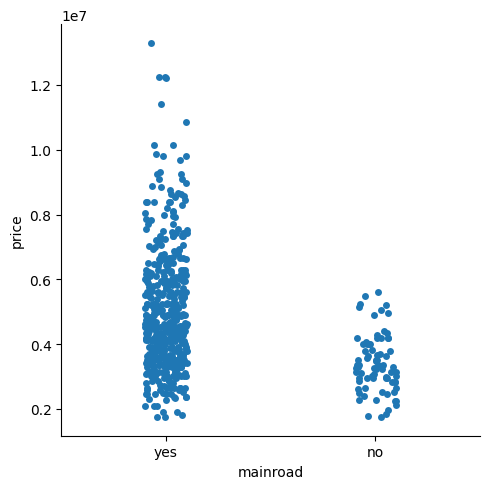

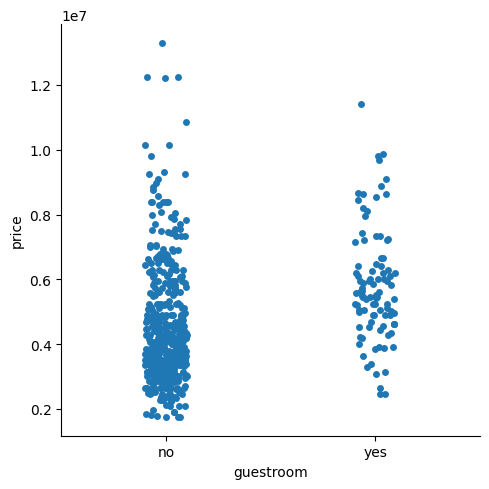

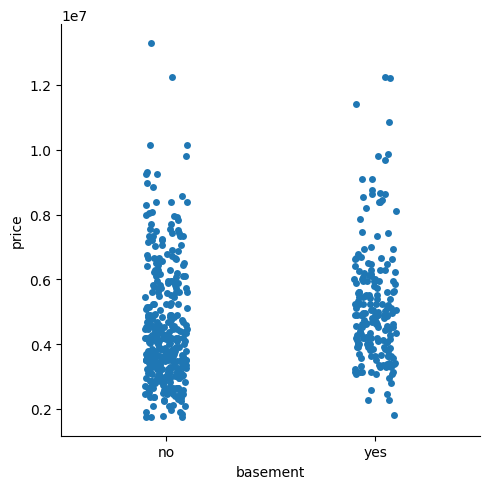

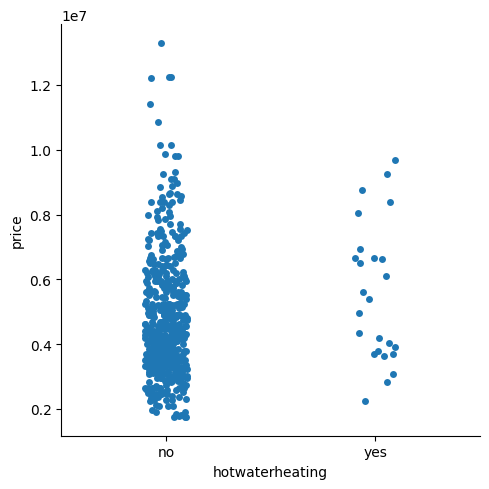

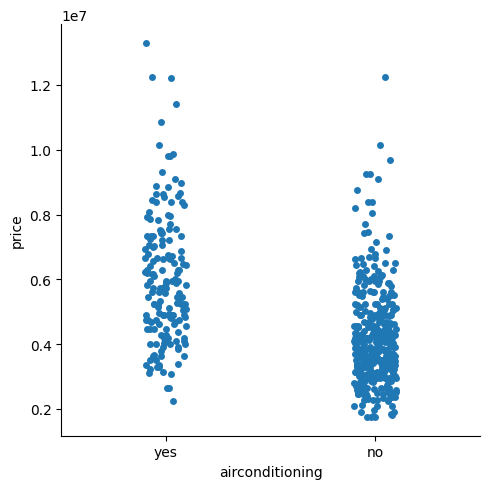

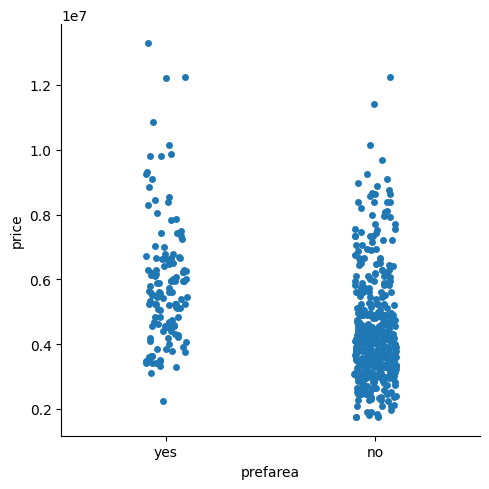

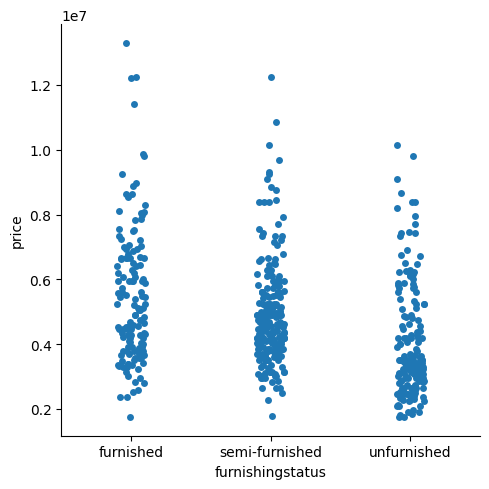

In [5]:
for i in categorical_columns:
    sns.catplot(data=df, x=i, y="price")

In [6]:
# describe data
df.describe(include='all')

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,543.000000,545.000000,545.000000,545,545,544,545,544,545.000000,545,545
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,NaN,2,3
top,NaN,NaN,NaN,NaN,NaN,yes,no,no,no,no,NaN,no,semi-furnished
freq,NaN,NaN,NaN,NaN,NaN,468,448,353,520,373,NaN,417,227
mean,4.766729e+06,5150.541284,2.965009,1.286239,1.805505,NaN,NaN,NaN,NaN,NaN,0.693578,NaN,NaN
std,1.870440e+06,2170.141023,0.739421,0.502470,0.867492,NaN,NaN,NaN,NaN,NaN,0.861586,NaN,NaN
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN


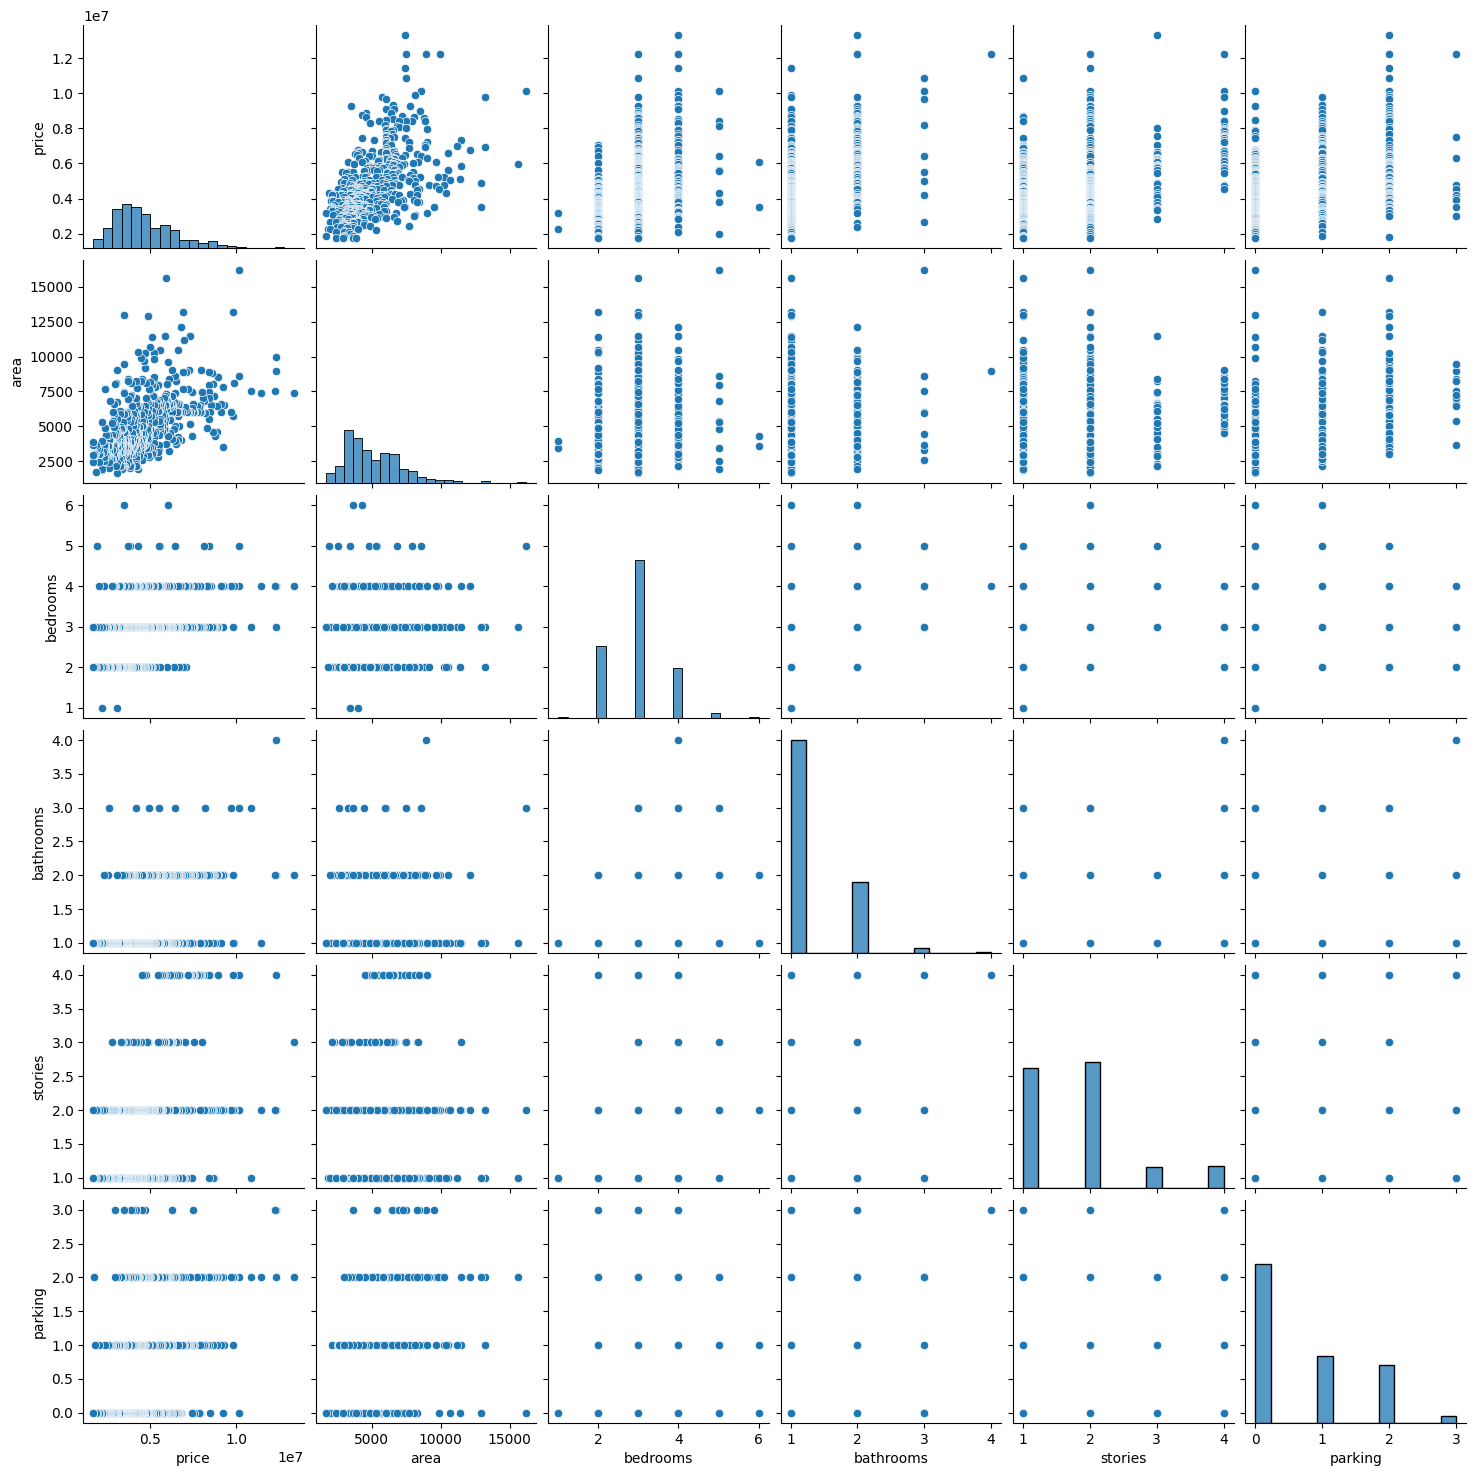

In [7]:
# generate pairplot for visualizing numerical variables
sns.pairplot(df)

C:\Users\aswin\AppData\Local\Temp\ipykernel_5216\3613222109.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


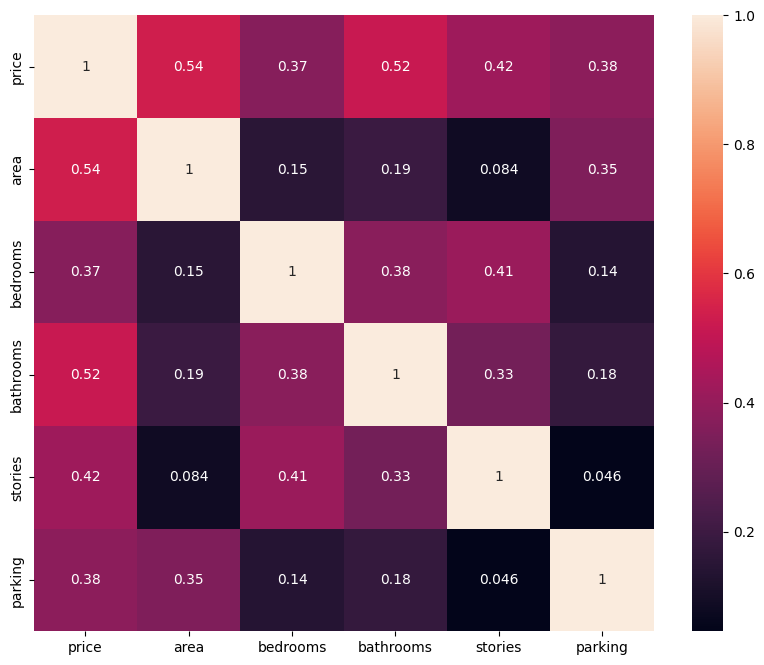

In [8]:
# create correlation matrix for understanding relationship between numerical variables
correlation_matrix = df.corr()

# create correlation chart
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

### Data Split

In [9]:
# column names in df
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [10]:
# feature selection
X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus']]

# target selection
y = df['price']

# Specifying numerical and categorical columns
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()

In [11]:
# Split the data into training and the rest (which includes both validation and test)
X_train, X_rest, y_train, y_rest = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the rest into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_rest, y_rest, test_size=0.5, random_state=42)

# Print shapes
print(f'Size of Train Set: {round(X_train.shape[0]/X.shape[0],2)}')
print(f'Size of Train Set: {round(X_val.shape[0]/X.shape[0],2)}')
print(f'Size of Train Set: {round(X_test.shape[0]/X.shape[0],2)}')

Size of Train Set: 0.8
Size of Train Set: 0.1
Size of Train Set: 0.1


### Data Preprocessing

In [12]:
# count sum of null values in all columns
df.isna().sum()

price               0
area                0
bedrooms            2
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            1
hotwaterheating     0
airconditioning     1
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

##### Hanlding numerical columns

In [13]:
# replace missing numrical values in X_train and X_test
num_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train_numerical = num_imputer.fit_transform(X_train[numrical_columns])
X_val_numerical = num_imputer.transform(X_val[numrical_columns])
X_test_numerical = num_imputer.transform(X_test[numrical_columns])

In [14]:
scaler = StandardScaler()
X_train_numerical = scaler.fit_transform(X_train_numerical)
X_val_numerical = scaler.fit_transform(X_val_numerical)
X_test_numerical = scaler.fit_transform(X_test_numerical)

##### Handling categorical columns

In [15]:
# replace missing categorical values in X_train and X_test
cat_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
X_train_categorical = cat_imputer.fit_transform(X_train[categorical_columns])
X_val_categorical = cat_imputer.transform(X_val[categorical_columns])
X_test_categorical = cat_imputer.transform(X_test[categorical_columns])

In [16]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_train_categorical = encoder.fit_transform(X_train_categorical)
X_val_categorical = encoder.transform(X_val_categorical)
X_test_categorical = encoder.transform(X_test_categorical)

##### Combine numerical and categorical columns

In [17]:
X_train = np.hstack((X_train_numerical, X_train_categorical))
X_val = np.hstack((X_val_numerical, X_val_categorical))
X_test = np.hstack((X_test_numerical, X_test_categorical))

### Model Training and Testing

##### Simple model example

In [18]:
# Build Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict Model on Train, Val and Test set
y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_val)
y_pred_test = model.predict(X_test)

# Print Scores on Train and Test Set
print(f"R2 score on Train set: {round(r2_score(y_train, y_pred_train),2)}")
print(f"R2 score on Val set: {round(r2_score(y_val, y_pred_val),2)}")
print(f"R2 score on Test set: {round(r2_score(y_test, y_pred_test),2)}")

R2 score on Train set: 0.68
R2 score on Val set: 0.62
R2 score on Test set: 0.66


##### Random Search CV Example

In [19]:
# Create instances of the models
lr = LinearRegression()
svr = SVR()
rf = RandomForestRegressor()

# Define hyperparameter ranges for each algorithm
param_dist_lr = {} 

param_dist_svr = {
    "C": uniform(0.1, 10),
    "kernel": ["linear", "poly", "rbf"]
}

param_dist_rf = {
    "n_estimators": randint(10, 100),
    "max_depth": randint(1, 32)
}

# Perform RandomizedSearchCV for each algorithm
random_search_lr = RandomizedSearchCV(lr, param_dist_lr, random_state=0, n_iter = 10, cv=5)
random_search_svr = RandomizedSearchCV(svr, param_dist_svr, random_state=0, n_iter = 10, cv=5)
random_search_rf = RandomizedSearchCV(rf, param_dist_rf, random_state=0, n_iter = 10, cv=5)


# Fit models to the data
random_search_lr.fit(X_train, y_train)
random_search_svr.fit(X_train, y_train)
random_search_rf.fit(X_train, y_train)


# print best param and score on models
print(f"Best Hyperparameter for LR: {random_search_lr.best_params_}")
print(f"Best R2 score for LR: {round(random_search_lr.best_score_,2)}")
print('')
print(f"Best Hyperparameter for SVR: {random_search_svr.best_params_}")
print(f"Best R2 score for SVR: {round(random_search_svr.best_score_,2)}")
print('')
print(f"Best Hyperparameter for RF: {random_search_rf.best_params_}")
print(f"Best R2 score for RF: {round(random_search_rf.best_score_,2)}")

C:\Users\aswin\anaconda3\envs\myenv_practice\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Hyperparameter for LR: {}
Best R2 score for LR: 0.64

Best Hyperparameter for SVR: {'C': 8.460787635373775, 'kernel': 'linear'}
Best R2 score for SVR: -0.06

Best Hyperparameter for RF: {'max_depth': 24, 'n_estimators': 80}
Best R2 score for RF: 0.59


In [20]:
# Build Random Forest Model
model = RandomForestRegressor(max_depth= 13, n_estimators= 57)
model.fit(X_train, y_train)

# Predict Model on Train and Test set
y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_val)
y_pred_test = model.predict(X_test)

# Print Scores on Train and Test Set
print(f"R2 score on Train set: {round(r2_score(y_train, y_pred_train),2)}")
print(f"R2 score on Val set: {round(r2_score(y_val, y_pred_val),2)}")
print(f"R2 score on Test set: {round(r2_score(y_test, y_pred_test),2)}")

R2 score on Train set: 0.95
R2 score on Val set: 0.58
R2 score on Test set: 0.62


### Save Model

In [21]:
# Save the model
joblib.dump(model, 'model.joblib')

# save the preprocessing steps
joblib.dump(num_imputer, 'num_imputer.joblib')
joblib.dump(cat_imputer, 'cat_imputer.joblib')
joblib.dump(scaler, 'scaler.joblib')
joblib.dump(encoder, 'encoder.joblib')

print("Sucessfully saved model!")

Sucessfully saved model!
